In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [16]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [17]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [18]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [19]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [20]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [21]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


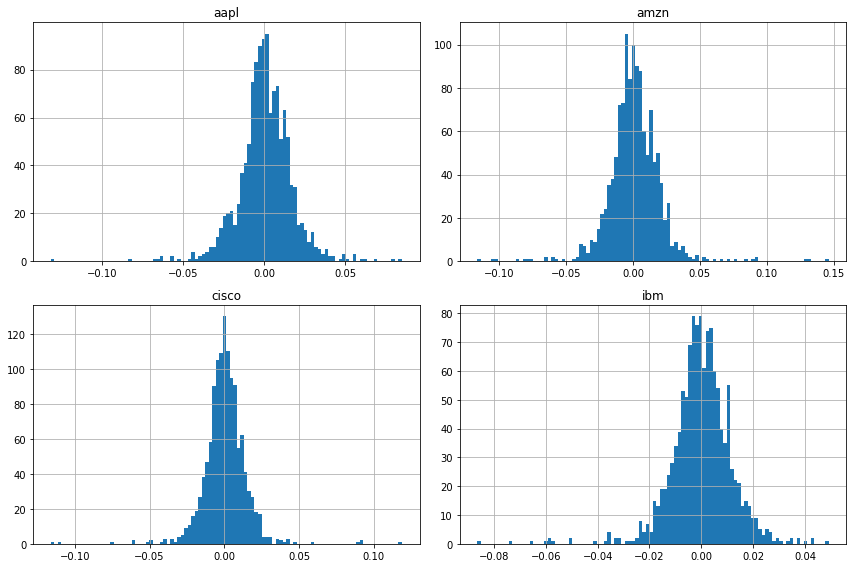

In [22]:
log_ret.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [23]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
aapl,1257.0,0.000614,0.016466,-0.131875,-0.007358,0.000455,0.009724,0.085022
cisco,1257.0,0.000497,0.014279,-0.116091,-0.006240,0.000213,0.007634,0.118862
ibm,1257.0,0.000011,0.011819,-0.086419,-0.005873,0.000049,0.006477,0.049130
amzn,1257.0,0.001139,0.019362,-0.116503,-0.008534,0.000563,0.011407,0.146225


In [24]:
log_ret.mean() * 252

aapl     0.154803
cisco    0.125291
ibm      0.002788
amzn     0.287153
dtype: float64

In [25]:
log_ret.cov() * 252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [26]:
# Seed bestimmen (optional)
np.random.seed(101)

# Aktienspalten
print('Stocks')
print(stocks.columns)
print('\n')

# Zufällige Gewichtungen erstellen
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Gewichtungen rebalancieren
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Erwartete Rendite
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Erwartete Volatilität
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Quotient
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)



Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.15599272049632004


Expected Volatility
0.18502649565909488


Sharpe Ratio
0.8430831483926032


In [27]:
np.sum(log_ret.mean() * weights * 252)

0.15599272049632004

In [28]:
np.random.seed(101)

num_ports = 5000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Zufällige Gewichtungen erstellen
    weights = np.array(np.random.random(4))

    # Gewichtungen rebalancieren
    weights = weights / np.sum(weights)
    
    # Gewichtungen speichern
    all_weights[ind,:] = weights

    # Erwartete Rückgabe
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Erwartete Varianz
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Quotient
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [29]:
sharpe_arr.max()

1.0303260551271067

In [30]:
sharpe_arr.argmax()

1420

In [31]:
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

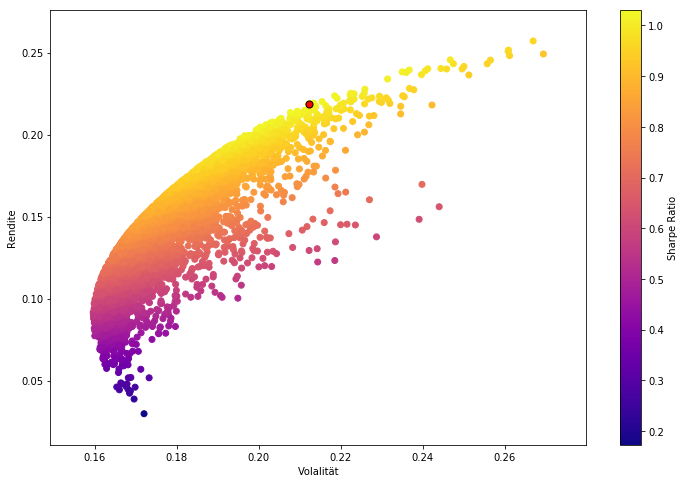

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volalität')
plt.ylabel('Rendite')

plt.scatter(vol_arr[1420],ret_arr[1420],c='red',s=50,edgecolors='black')

In [33]:
def get_ret_vol_sr(weights):
    """
    Liest Gewichtungen ein, gibt Array mit Rückgabewert, Volatilität und Sharpe Quotient zurück
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [34]:
from scipy.optimize import minimize

In [35]:
#help(minimize)

In [62]:
def neg_sharpe(weights) : 
    return get_ret_vol_sr(weights)[2]* -1

In [63]:
def check_sum(weights):
    '''
    Gibt 0 zurück, falls die Summe der Gewichtungen 1.0 ist.
    '''
    return np.sum(weights) - 1

In [68]:
cons = ({'type':'eq','fun': check_sum})

In [69]:
bounds = ((0,1), (0,1), (0,1), (0,1))

In [70]:
init_guess = [0.25,0.25,0.25,0.25]

In [71]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [72]:
opt_results

     fun: -1.0307168703346545
     jac: array([ 5.64306974e-05,  4.18573618e-05,  3.39921743e-01, -4.45097685e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([2.66289765e-01, 2.04189837e-01, 9.23875776e-17, 5.29520398e-01])

In [73]:
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

In [75]:
frontier_y = np.linspace(0,0.3,100)

In [77]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [78]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

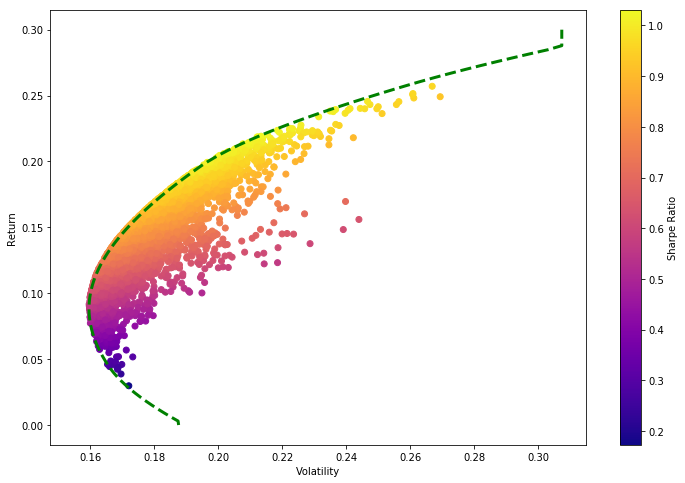

In [79]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Füge Grenzlinie hinzu
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)